# Regresión lineal usando descenso por gradiente

En esta libreta programaremos y evaluaremos el algoritmo de descenso por gradiente para regresión lineal.

In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error as ecm
from sklearn.model_selection import train_test_split

## Conjunto de datos

Posteriormente cargamos los datos de GPAs de alumnos de licenciatura (fuente: http://onlinestatbook.com/2/case_studies/sat.html). Usamos sólo el atributo Computer Science GPA (columna <tt>comp_GPA</tt>) como regresor para el University GPA (columna <tt>univ_GPA</tt>).

In [2]:
sat = pd.read_csv('http://onlinestatbook.com/2/case_studies/data/sat.txt', sep=' ')

X = sat.comp_GPA.to_numpy()[:, np.newaxis]
y = sat.univ_GPA.to_numpy()[:, np.newaxis]

ones = np.ones((X.shape[0], 1)) # vector columna de unos
X = np.concatenate([ones, X], axis = 1)

Dividimos aleatoriamente el conjunto de datos en 80% para entrenamiento y 20% para validación. Para eso usaremos la función <tt>train_test_split</tt> de scikit-learn.

In [3]:
X_ent, X_valid, y_ent, y_valid = train_test_split(X, y, test_size=0.2, random_state = 42)
X_rango = np.arange(2.0, 4.0, 0.01)[:, np.newaxis]
ones_rango = np.ones((X_rango.shape[0], 1))
X_rango = np.concatenate((ones_rango, X_rango), axis=1).T

## Descenso por gradiente

Vamos a entrenar un modelo de regresión lineal usando descenso por gradiente. En particular, buscaremos minimizar la suma de errores cuadráticos, la cual definimos de la siguiente manera: $$ E(y, \hat{y}) = \frac{1}{2} \sum_{i=1}^{n}(\hat{y}^{(i)} - y^{(i)})^2 $$

El gradiente de esta función de pérdida respecto a los parámetros $\theta \in \mathcal{R}^d$ está dado por
$$ \nabla E(y, \hat{y}) = [\frac{\partial E(y, \hat{y})}{\partial \theta_0}, \frac{\partial E(y, \hat{y})}{\partial \theta_1}, ..., \frac{\partial E(y, \hat{y})}{\partial \theta_d}]$$
donde
$$ \frac{\partial E(y, \hat{y})}{\partial \theta_j} = \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)}) \cdot x_j^{(i)}$$

In [4]:
def gradiente(X, y, y_pred):
    return X.T @ (y_pred - y)

El algoritmo de descenso por gradiente quedaría como sigue:

In [5]:
def descenso_gradiente(X, y, n_iter = 10, tasa = 0.001):
    hist_error = np.zeros(n_iter)
    # Inicializamos parámetro con número aleatorio
    param = np.random.rand(X.shape[1], 1)
    for it in range(n_iter):
        # Obtenemos predicciones con parámetro actual
        y_pred = X @ param
        hist_error[it] = ecm(y, y_pred)
        # Actualizamos parámetros
        param = param - tasa*gradiente(X, y, y_pred)
    return param, hist_error

## Entrenamiento

Entrenamos nuestro modelo de regresión lineal con este algoritmo por 1000 iteraciones, con una tasa de aprendizaje de 0.001.

In [6]:
n_iter = 1000
param_dg, errores = descenso_gradiente(X_ent, y_ent, n_iter = n_iter, tasa = 0.001)

Graficamos el error cuadrático medio en cada iteración:

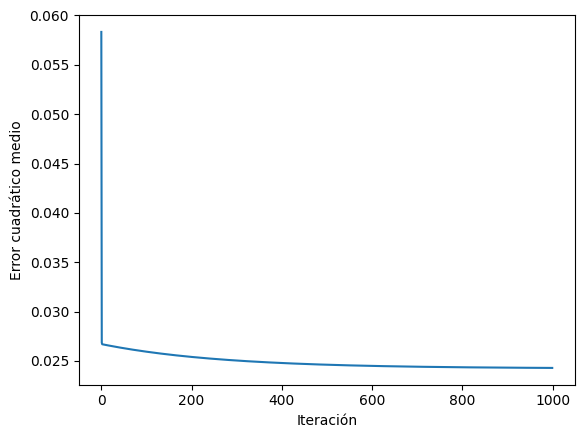

In [7]:
plt.plot(np.array(range(n_iter)), errores)
plt.xlabel(u'Iteración')
plt.ylabel(u'Error cuadrático medio')
plt.show()

Comparamos los parámetros encontrados por mínimos cuadrados y usando el algoritmo del descenso por gradiente.

In [9]:
param_mc = np.linalg.inv(X_ent.T @ X_ent) @ (X_ent.T @ y_ent)

print(f'MC = {param_mc.T}')
print(f'DG = {param_dg.T}')

MC = [[0.67739565 0.80044273]]
DG = [[0.62816373 0.81577453]]


Visualizamos las rectas con ambas soluciones

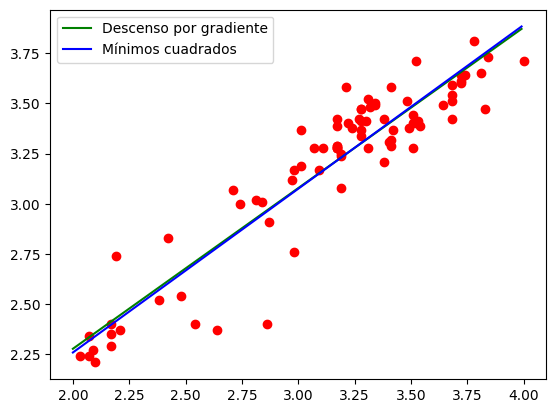

In [10]:
y_rango_dg = X_rango.T @ param_dg
y_rango_mc = X_rango.T @ param_mc

plt.plot(X_ent[:,1], y_ent[:, 0], 'ro')
plt.plot(X_rango.T[:,1], y_rango_mc[:, 0], 'g', label='Descenso por gradiente')
plt.plot(X_rango.T[:,1], y_rango_dg[:, 0], 'b', label='Mínimos cuadrados')
plt.legend()
plt.show()

## Ejercicio

- Programa y evalúa el algoritmo del descenso por gradiente para regresión lineal que minimice la siguiente función de error: $$ E(y, \hat{y}) = \frac{1}{2n} \sum_{i=1}^{n}(\hat{y}^{(i)}-y^{(i)})^2 $$

Se la derivada parcial de $E(y, \hat{y})$ respecto a $\theta_j$ es $$ \frac{\partial E(y, \hat{y})}{\partial \theta_j} = \frac{1}{n}\sum_{i=1}^n [(\hat{y}^{(i)}-y^{(i)})x_j^{(i)}]$$

In [12]:
def gradiente2(X, y, y_pred):
    return (X.T @ (y_pred - y)) / X.shape[0]

In [13]:
def descenso_gradiente2(X, y, n_iter = 10, tasa = 0.001):
    hist_error = np.zeros(n_iter)
  
    # Inicializamos parámetro con número aleatorio
    param = np.random.rand(X.shape[1], 1)

    for it in range(n_iter):
        # Obtenemos predicciones con parámetro actual
        y_predicha =  X @ param
        hist_error[it] = ecm(y, y_predicha)
        # Actualizamos parámetro
        param = param - tasa * gradiente2(X, y, y_predicha)

    return param, hist_error

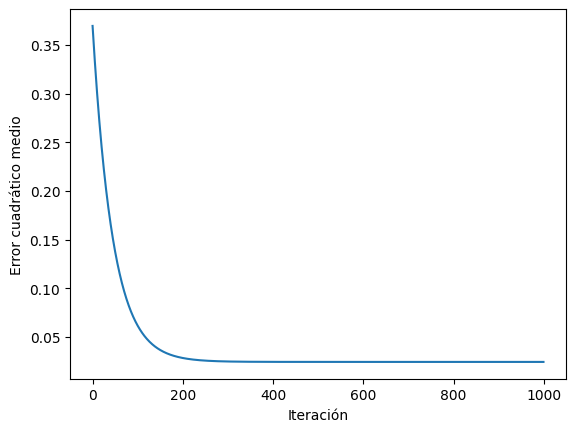

In [14]:
n_iter = 1000
param_dg, errores= descenso_gradiente2(X_ent, 
                                      y_ent, 
                                      n_iter = n_iter, 
                                      tasa = 0.001)
plt.plot(np.array(range(n_iter)), errores)
plt.xlabel(u'Iteración')
plt.ylabel(u'Error cuadrático medio')
plt.show()